In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
data= pd.read_csv('D:\\Stock_Anlysis\\btc_data.csv', parse_dates=['Date'])

In [ ]:
data['Adj Close']

In [26]:
data.set_index('Date', inplace=True)

In [27]:
data.head(10)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-09-17 00:00:00+00:00,457.334015,457.334015,468.174011,452.421997,465.864014,21056800.0
2014-09-18 00:00:00+00:00,424.440002,424.440002,456.859985,413.104004,456.859985,34483200.0
2014-09-19 00:00:00+00:00,394.795990,394.795990,427.834992,384.532013,424.102997,37919700.0
2014-09-20 00:00:00+00:00,408.903992,408.903992,423.295990,389.882996,394.673004,36863600.0
2014-09-21 00:00:00+00:00,398.821014,398.821014,412.425995,393.181000,408.084992,26580100.0
2014-09-22 00:00:00+00:00,402.152008,402.152008,406.915985,397.130005,399.100006,24127600.0
2014-09-23 00:00:00+00:00,435.790985,435.790985,441.557007,396.196991,402.092011,45099500.0
2014-09-24 00:00:00+00:00,423.204987,423.204987,436.112000,421.131988,435.751007,30627700.0
2014-09-25 00:00:00+00:00,411.574005,411.574005,423.519989,409.467987,423.156006,26814400.0


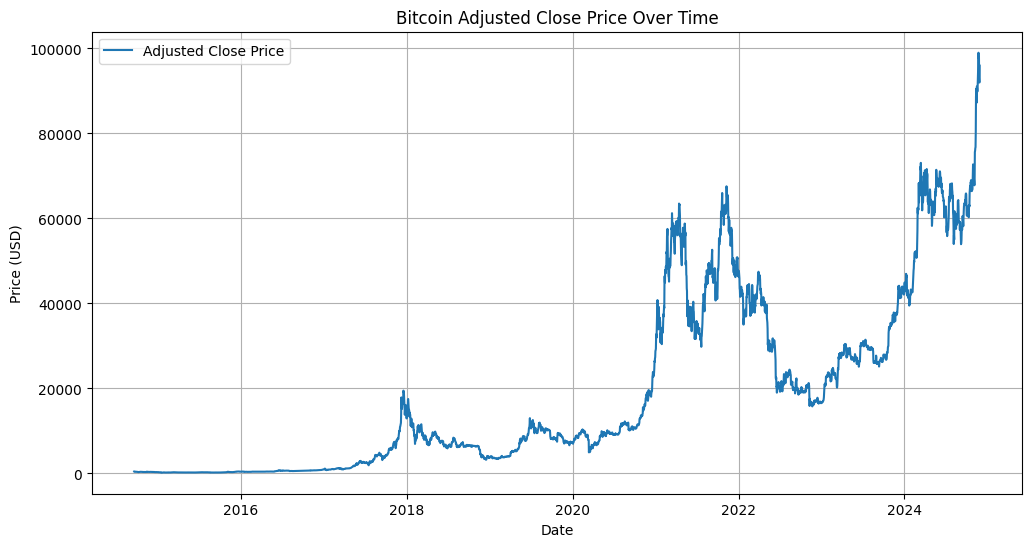

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(data.index,data['Adj Close'], label='Adjusted Close Price')
# plt.plot(Data.index, Data['Adj Close '], label='Adjusted Close ')
plt.title('Bitcoin Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# train_size= int(len(data) *0.8)
# train_data= data[:train_size]
# test_data= data[train_size:]

In [29]:
data.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

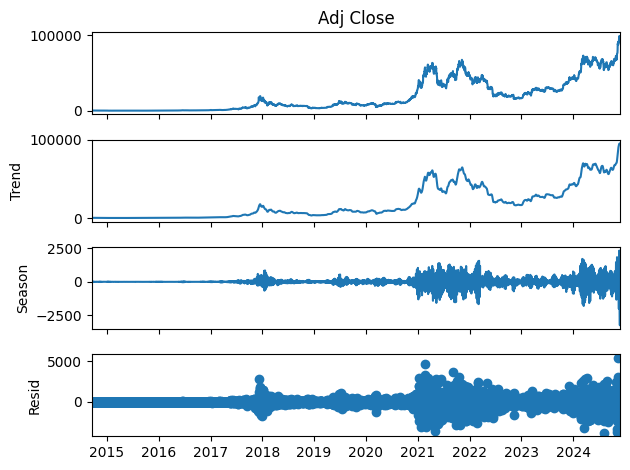

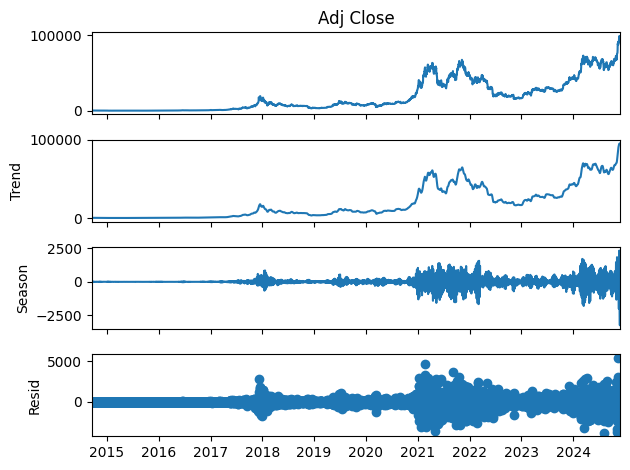

In [31]:
from statsmodels.tsa.seasonal import STL

stl_model= STL(data['Adj Close'])
result=stl_model.fit()

residual=result.resid
result.plot()


In [32]:
import numpy as np

Q1 = np.percentile(residual, 25)
Q3 = np.percentile(residual, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (residual < lower_bound) | (residual > upper_bound)
print(f"Number of Outliers (IQR): {sum(outliers)}")




Number of Outliers (IQR): 876


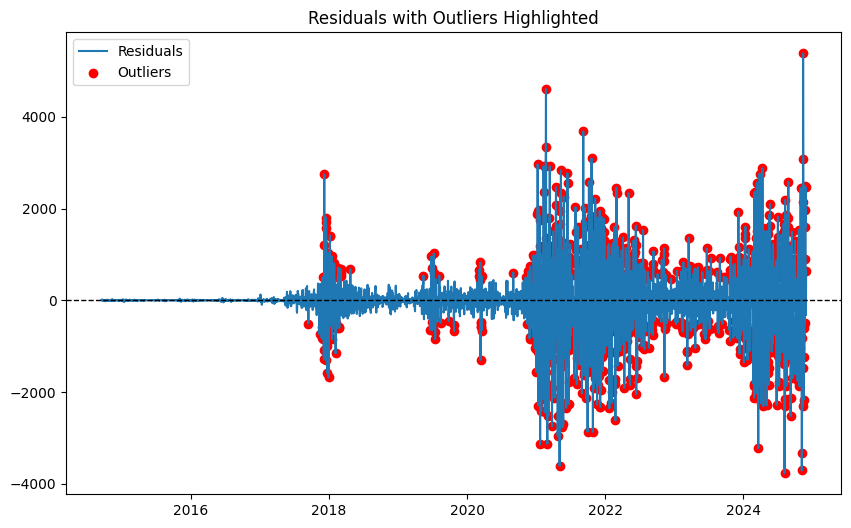

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(residual, label="Residuals")
plt.scatter(residual.index[outliers], residual[outliers], color='red', label="Outliers")
plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
plt.legend()
plt.title("Residuals with Outliers Highlighted")
plt.show()


In [34]:
from scipy.stats import shapiro

stat, p = shapiro(residual)
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p}")

if p < 0.05:
    print("Residuals are not normally distributed (Reject H0).")
else:
    print("Residuals are normally distributed (Fail to reject H0).")


Shapiro-Wilk Test Statistic: 0.7985891178869687, p-value: 8.000548101054838e-56
Residuals are not normally distributed (Reject H0).


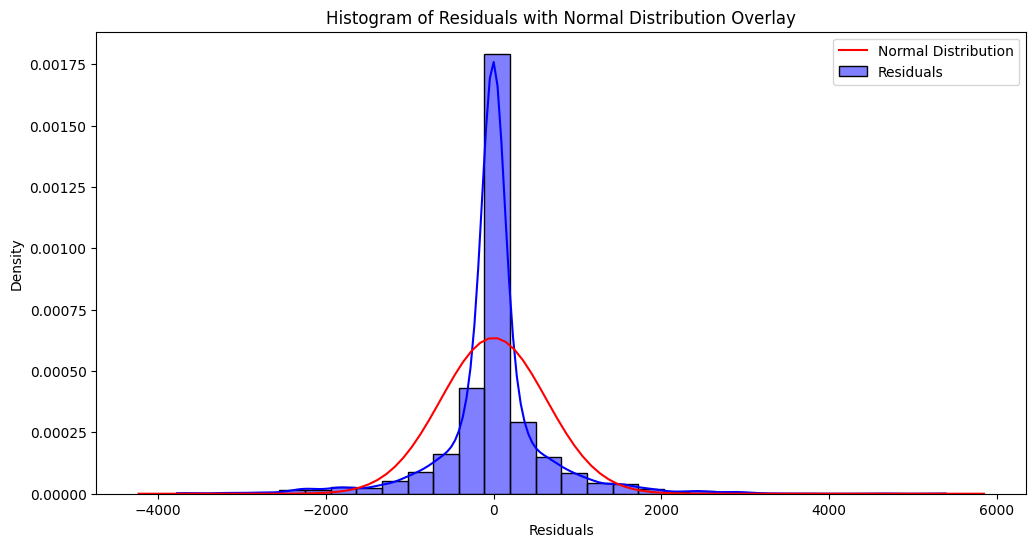

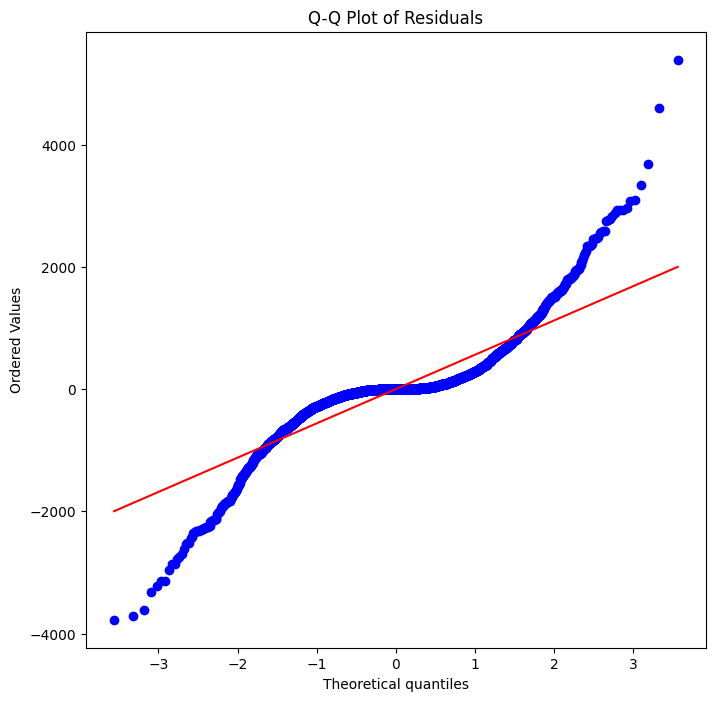

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Histogram with normal distribution overlay
plt.figure(figsize=(12, 6))
sns.histplot(residual, kde=True, bins=30, color="blue", stat="density", label="Residuals")
xmin, xmax = plt.xlim()  # Get the x-axis limits
x = np.linspace(xmin, xmax, 100)  # Create a range of x values
normal_dist = stats.norm.pdf(x, np.mean(residual), np.std(residual))  # Calculate the normal distribution
plt.plot(x, normal_dist, 'r-', label='Normal Distribution')  # Overlay the normal distribution
plt.title("Histogram of Residuals with Normal Distribution Overlay")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.legend()
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 8))
stats.probplot(residual, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()





Test After log transformation


In [37]:
log_data= data


In [38]:
log_data['Adj_close_log']=  np.log(log_data['Adj Close'])

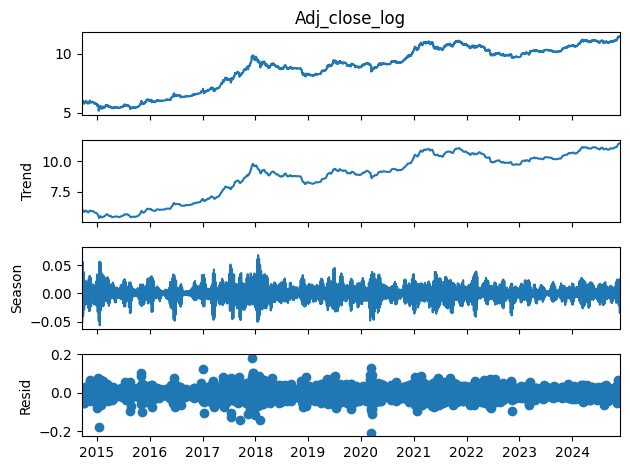

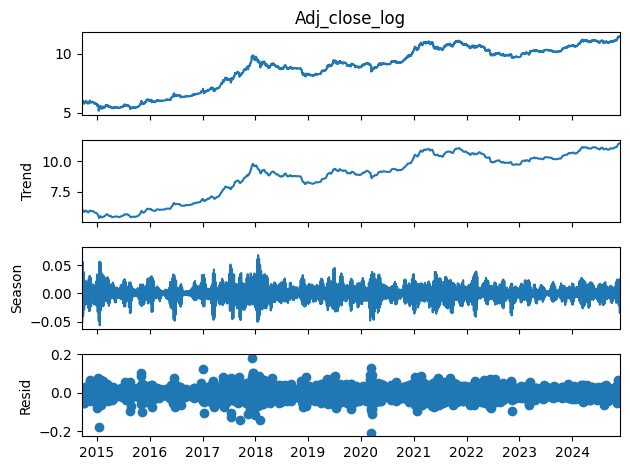

In [41]:
from statsmodels.tsa.seasonal import STL

stl_model_log= STL(data['Adj_close_log'])
model_result=stl_model_log.fit()

log_residual=result.resid
result.plot()


In [42]:
import numpy as np

Q1 = np.percentile(log_residual, 25)
Q3 = np.percentile(log_residual, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (log_residual < lower_bound) | (log_residual > upper_bound)
print(f"Number of Outliers (IQR): {sum(outliers)}")




Number of Outliers (IQR): 171


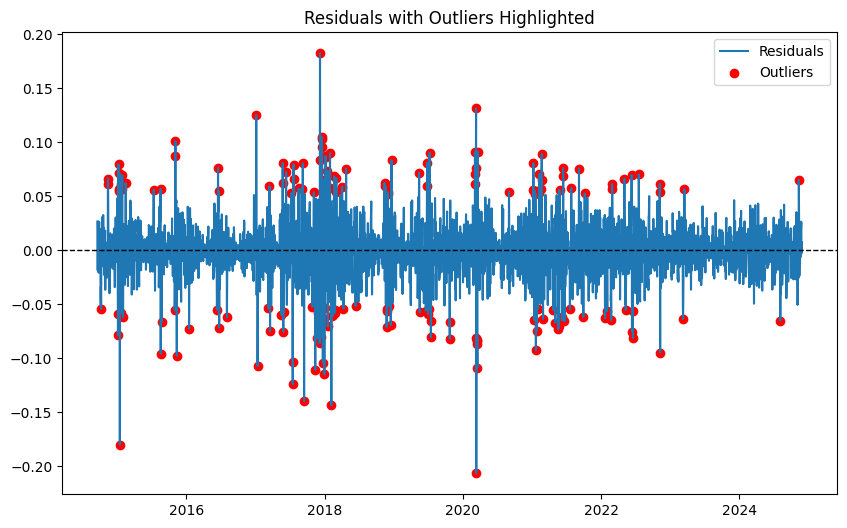

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(log_residual, label="Residuals")
plt.scatter(log_residual.index[outliers], log_residual[outliers], color='red', label="Outliers")
plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
plt.legend()
plt.title("Residuals with Outliers Highlighted")
plt.show()


C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\Home\AppData\Roaming\Python\Python311\site-packages


After Winsorization:
           Adj Close         Close          High           Low          Open  \
count   3725.000000   3725.000000   3725.000000   3725.000000   3725.000000   
mean   18869.384311  18869.384311  19272.890788  18401.138139  18844.931953   
std    20908.954316  20908.954316  21345.332560  20398.100557  20874.723330   
min      178.102997    178.102997    211.731003    171.509995    176.897003   
25%     1200.369995   1200.369995   1217.569946   1179.040039   1193.770020   
50%     9288.018555   9288.018555   9440.875977   9137.509766   9290.629883   
75%    30214.355470  30214.355470  30609.310550  29600.275390  30172.423830   
max    98997.664060  98997.664060  99655.500000  97232.890630  99006.742190   

             Volume  Adj_close_log  BTC_Price_Winsorized  
count  3.725000e+03    3725.000000           3725.000000  
mean   1.816301e+10       8.794356              8.793213  
std    1.977500e+10       1.818229              1.815584  
min    5.914570e+06       5.1

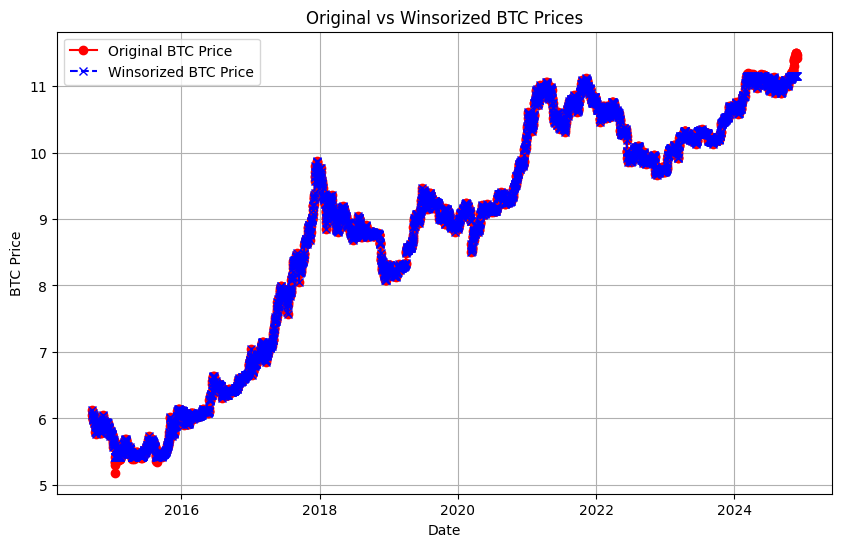

In [51]:
from scipy.stats.mstats import winsorize


log_data['BTC_Price_Winsorized'] = winsorize(log_data['Adj_close_log'], limits=[0.01, 0.01])

# Compare the original and winsorized data
print("\nAfter Winsorization:\n", log_data.describe())

# Plot Original vs Winsorized Data
plt.figure(figsize=(10, 6))
plt.plot(data.index, log_data['Adj_close_log'], label='Original BTC Price', color='red', marker='o')
plt.plot(data.index, log_data['BTC_Price_Winsorized'], label='Winsorized BTC Price', color='blue', linestyle='--', marker='x')
plt.title('Original vs Winsorized BTC Prices')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend()
plt.grid()
plt.show()

In [45]:
from scipy.stats import shapiro

stat, p = shapiro(log_residual)
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p}")

if p < 0.05:
    print("Residuals are not normally distributed (Reject H0).")
else:
    print("Residuals are normally distributed (Fail to reject H0).")


Shapiro-Wilk Test Statistic: 0.9509652329122987, p-value: 1.3276085322097482e-33
Residuals are not normally distributed (Reject H0).


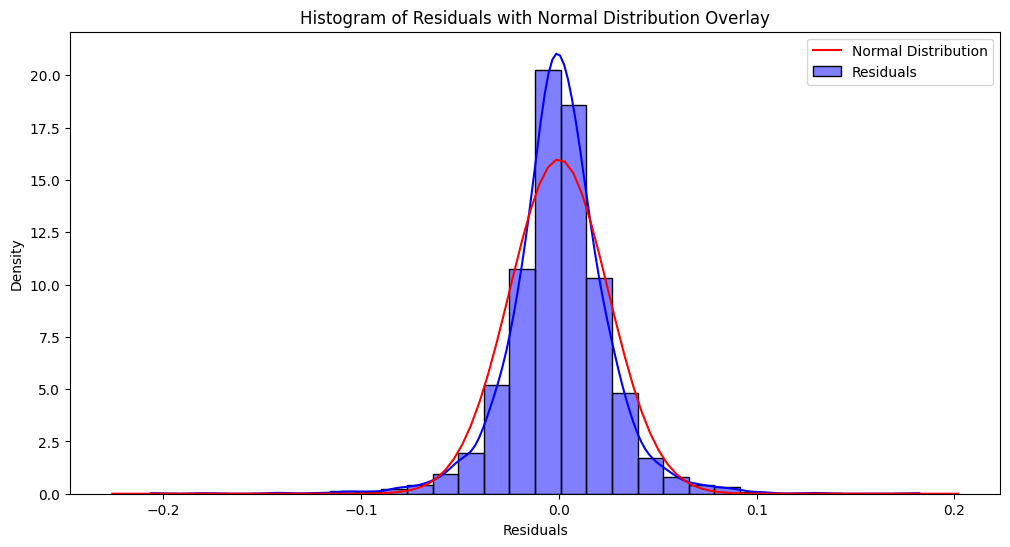

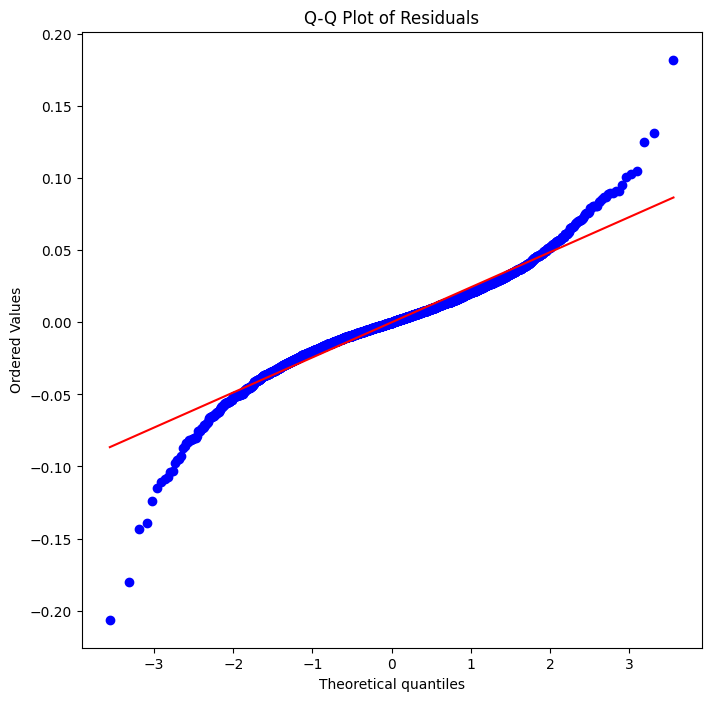

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Histogram with normal distribution overlay
plt.figure(figsize=(12, 6))
sns.histplot(log_residual, kde=True, bins=30, color="blue", stat="density", label="Residuals")
xmin, xmax = plt.xlim()  # Get the x-axis limits
x = np.linspace(xmin, xmax, 100)  # Create a range of x values
normal_dist = stats.norm.pdf(x, np.mean(log_residual), np.std(log_residual))  # Calculate the normal distribution
plt.plot(x, normal_dist, 'r-', label='Normal Distribution')  # Overlay the normal distribution
plt.title("Histogram of Residuals with Normal Distribution Overlay")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.legend()
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 8))
stats.probplot(log_residual, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()





C:\Users\Home\AppData\Local\Temp\ipykernel_20176\1528969075.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_data['BTC_Price_Diff'] = log_data['BTC_Price_Winsorized'].diff()


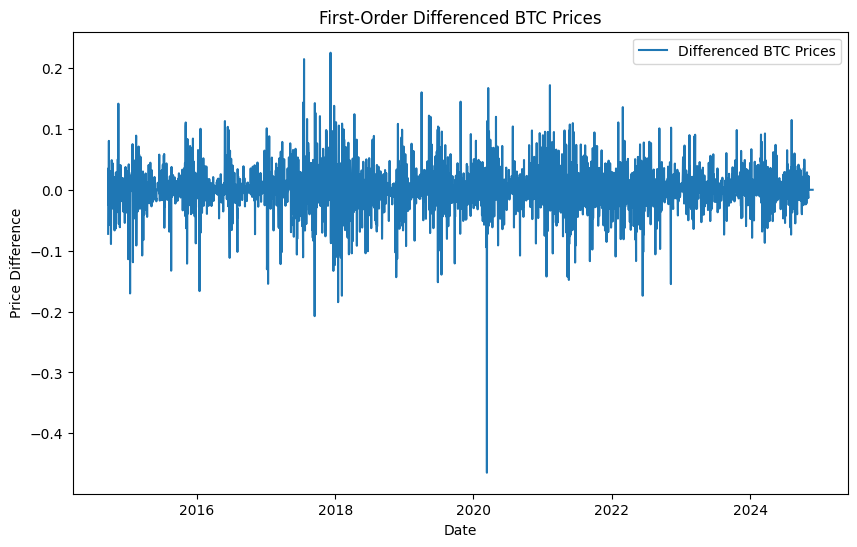

ADF Statistic: -62.28007184162162
p-value: 0.0
Data is stationary after differencing.


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# First-order differencing
log_data['BTC_Price_Diff'] = log_data['BTC_Price_Winsorized'].diff()

# Drop NaN values created after differencing
log_data = log_data.dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(log_data.index, log_data['BTC_Price_Diff'], label='Differenced BTC Prices')
plt.title("First-Order Differenced BTC Prices")
plt.xlabel("Date")
plt.ylabel("Price Difference")
plt.legend()
plt.show()

# ADF Test for Stationarity
result = adfuller(log_data['BTC_Price_Diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
    print("Data is stationary after differencing.")
else:
    print("Data is still not stationary.")


C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Trend Prediction Accuracy: 72.31%


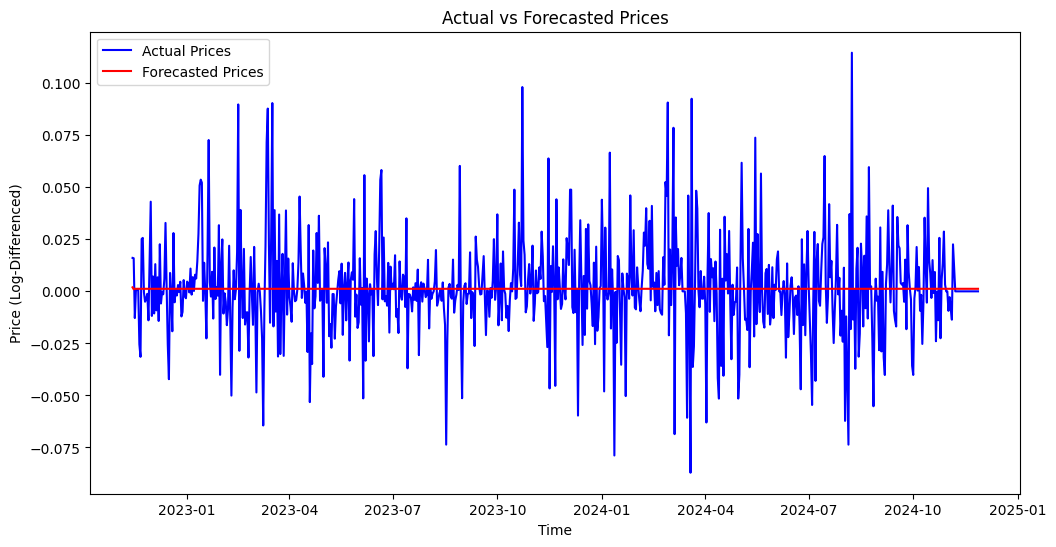

Actual Trends:  ['DOWN' 'DOWN' 'UP' 'DOWN' 'UP' 'DOWN' 'DOWN' 'UP' 'UP' 'DOWN' 'DOWN' 'UP'
 'UP' 'DOWN' 'UP' 'UP' 'DOWN' 'UP' 'DOWN' 'UP' 'DOWN' 'UP' 'DOWN' 'UP'
 'DOWN' 'UP' 'DOWN' 'UP' 'UP' 'DOWN' 'DOWN' 'DOWN' 'UP' 'DOWN' 'DOWN' 'UP'
 'DOWN' 'UP' 'DOWN' 'UP' 'DOWN' 'UP' 'DOWN' 'UP' 'UP' 'DOWN' 'DOWN' 'UP'
 'DOWN' 'DOWN' 'UP' 'DOWN' 'UP' 'DOWN' 'UP' 'DOWN' 'UP' 'UP' 'UP' 'UP'
 'DOWN' 'DOWN' 'UP' 'DOWN' 'DOWN' 'UP' 'UP' 'DOWN' 'DOWN' 'UP' 'DOWN' 'UP'
 'DOWN' 'UP' 'DOWN' 'UP' 'DOWN' 'UP' 'UP' 'DOWN' 'UP' 'DOWN' 'DOWN' 'UP'
 'UP' 'DOWN' 'DOWN' 'UP' 'UP' 'DOWN' 'UP' 'UP' 'UP' 'DOWN' 'UP' 'DOWN'
 'DOWN' 'UP' 'DOWN' 'UP' 'UP' 'DOWN' 'UP' 'UP' 'DOWN' 'DOWN' 'UP' 'DOWN'
 'DOWN' 'UP' 'UP' 'DOWN' 'DOWN' 'DOWN' 'DOWN' 'UP' 'UP' 'UP' 'UP' 'DOWN'
 'DOWN' 'UP' 'UP' 'DOWN' 'UP' 'DOWN' 'UP' 'DOWN' 'UP' 'DOWN' 'UP' 'UP'
 'DOWN' 'UP' 'UP' 'DOWN' 'UP' 'DOWN' 'DOWN' 'DOWN' 'UP' 'DOWN' 'DOWN' 'UP'
 'UP' 'UP' 'UP' 'DOWN' 'DOWN' 'UP' 'DOWN' 'DOWN' 'UP' 'DOWN' 'UP' 'DOWN'
 'UP' 'DOWN' 'UP' 'DOWN' 'UP' 'UP' 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import accuracy_score

# Assume 'BTC_Price_LogDiff' is the stationary column used for modeling
data = log_data['BTC_Price_Diff'].dropna()

# Split data into training and testing sets (80% train, 20% test)
train_size = int(0.8 * len(data))
train, test = data[:train_size], data[train_size:]

# Fit ARIMA model on training data
model = ARIMA(train, order=(1, 0, 1))  # ARIMA(p, d, q) -> p=AR, d=differencing, q=MA
model_fit = model.fit()

# Forecast on test data
forecast = model_fit.forecast(steps=len(test))

# Compare forecasted values to determine trend (up or down)
# If forecasted value > previous value -> UP, else -> DOWN
trend_actual = np.where(test > test.shift(1), 'UP', 'DOWN')  # Actual trend
trend_forecast = np.where(forecast > test.shift(1), 'UP', 'DOWN')  # Forecasted trend

# Evaluate accuracy
accuracy = accuracy_score(trend_actual[1:], trend_forecast[1:])
print(f"Trend Prediction Accuracy: {accuracy:.2%}")

# Plot actual vs forecasted trends
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Prices', color='blue')
plt.plot(test.index, forecast, label='Forecasted Prices', color='red')
plt.title('Actual vs Forecasted Prices')
plt.xlabel('Time')
plt.ylabel('Price (Log-Differenced)')
plt.legend()
plt.show()

# Print trends
print("Actual Trends: ", trend_actual[1:])
print("Forecasted Trends: ", trend_forecast[1:])
